# Essential packages (Numpy, Matplotlib, Scipy)

Python `list`s are not a good way of representing numerical data:

In [ ]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
l*2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
l + [1 for i in l]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Numpy `array` to the rescue!

In [ ]:
import numpy as np

In [ ]:
a = np.array(l)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
type(a)

numpy.ndarray

Another way of constructing a range of numbers in Numpy:

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Numpy `array`s behave like vectors:

In [ ]:
a*2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
a + np.ones_like(a)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

---

### The simplest way of plotting numerical data: `matplotlib`'s `pyplot`:

In [ ]:
import matplotlib.pyplot as plt

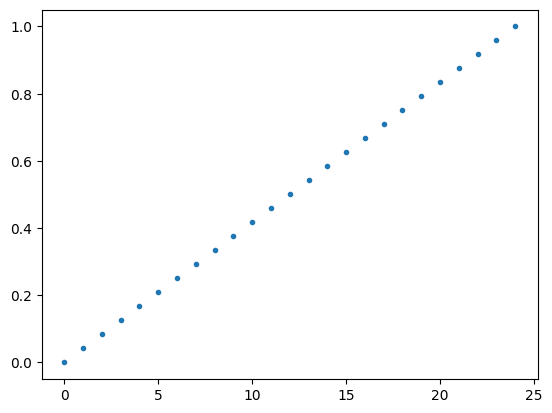

In [ ]:
t = np.linspace(0, 1, 25)
plt.plot(t, '.')

### Numpy defines some handy numerical functions:

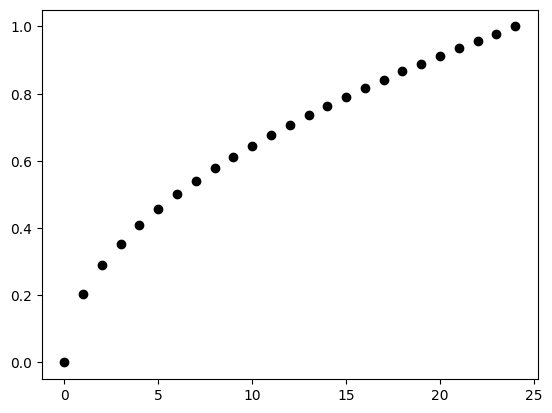

In [ ]:
plt.plot(np.sqrt(t), 'ko')

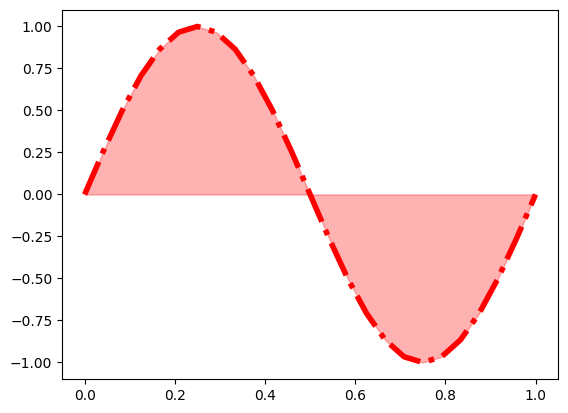

In [ ]:
sine = np.sin(2*np.pi*t)
plt.plot(t, sine, 'r-.', lw=4)
plt.fill_between(t, sine, color='r', alpha=0.3)

We access elements of Numpy `array`s the same way we did with `list`s:

In [ ]:
sine[:3]

array([0.        , 0.25881905, 0.5       ])

In [ ]:
sine[len(sine)//2:] = 0

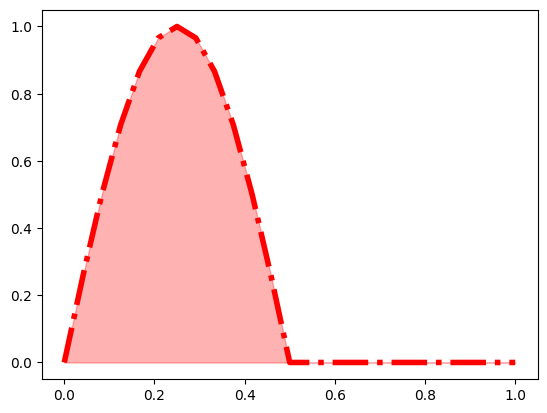

In [ ]:
plt.plot(t, sine, 'r-.', lw=4)
plt.fill_between(t, sine, color='r', alpha=0.3)

Numpy `array` objects actually have quite a lot of attributes and methods:

In [ ]:
sine?

---

Of course, we are not confined to 1-dimensional `array`s:

In [ ]:
noise = np.random.rand(100, 100)
np.min(noise), np.max(noise)

(1.0160094133571107e-05, 0.9998585039701928)

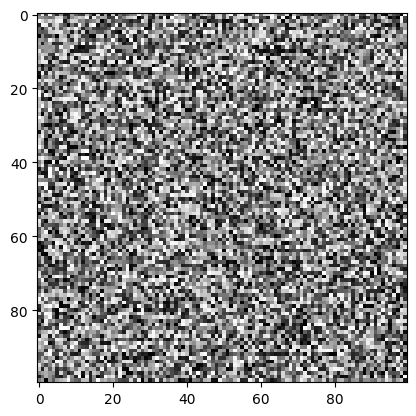

In [ ]:
plt.imshow(noise, cmap='gray')

And if we try something a bit more interesting:

In [ ]:
width = 100
height = 50

In [ ]:
x = np.linspace(-2, 2, width)
y = np.linspace(-1, 1, height)
X, Y = np.meshgrid(x, y)
Z = np.sin(10 * (X**2 + Y**2)) / 10
Z.shape

(50, 100)

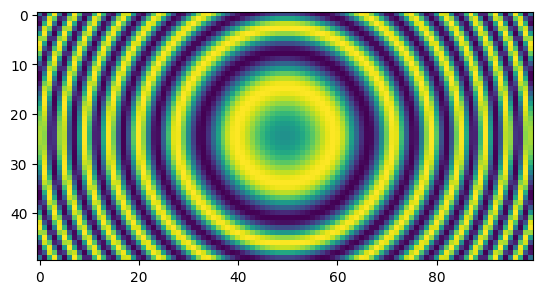

In [ ]:
plt.imshow(Z)

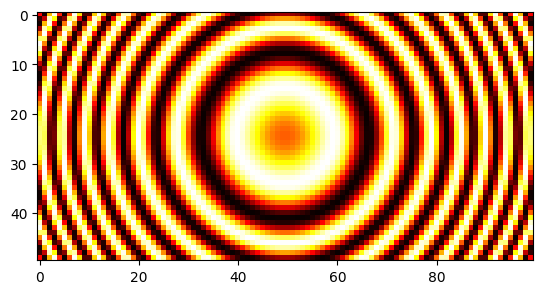

In [ ]:
plt.imshow(Z, cmap='hot')

In [ ]:
np.min(Z), np.max(Z)

(-0.09999982641650831, 0.09999961596591142)

---

To get the values of `Z` into the usual 8-bit grayscale image range:

In [ ]:
Z_image = Z - np.min(Z)
Z_image = (Z_image / np.max(Z_image) * 255).astype(np.uint8)
np.min(Z_image), np.max(Z_image)

(0, 255)

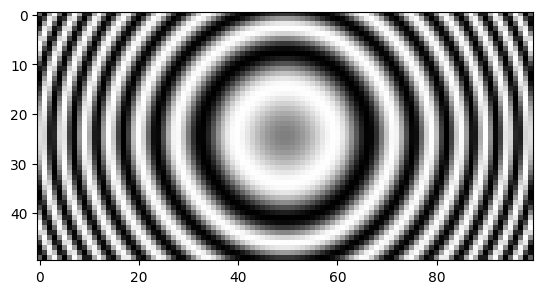

In [ ]:
plt.imshow(Z_image, cmap='gray')

In [ ]:
import imageio
imageio.v3.imwrite('./data/ripple.png', Z_image, mode='P')

---

If we look a bit closer at our image objets, we will se that they are actually Numpy `array`s:

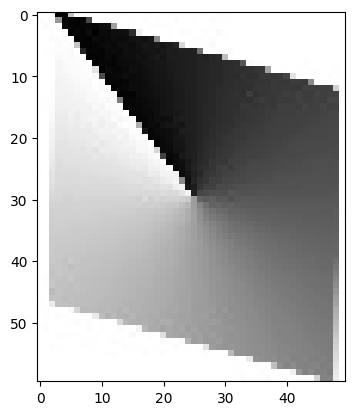

In [ ]:
image = imageio.v3.imread('data/image_1.jpg')
plt.imshow(image, cmap='gray')

In [ ]:
image.min(), image.max(), image.sum(), image.mean(), image.std()

(29, 255, 514538, 171.51266666666666, 73.91712367840681)

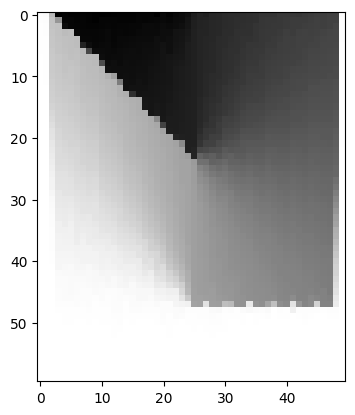

In [ ]:
plt.imshow(np.sort(image, axis=0), cmap='gray')

---

## Interpolation & Approximation

In [ ]:
from scipy.interpolate import InterpolatedUnivariateSpline, interp2d, RectBivariateSpline, RegularGridInterpolator

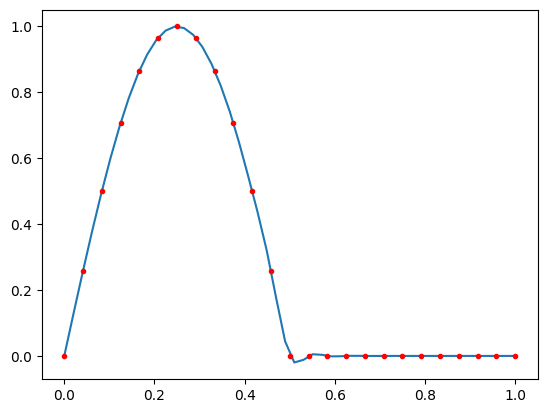

In [ ]:
spl = InterpolatedUnivariateSpline(t, sine)
t_new = np.linspace(np.min(t), np.max(t), len(t)*2)
plt.plot(t_new, spl(t_new))
plt.plot(t, sine, 'r.')

Interpolating an image:

In [ ]:
old_x = np.arange(image.shape[1])
old_y = np.arange(image.shape[0])

new_x = np.linspace(0, image.shape[1]-1, image.shape[1]*2)
new_y = np.linspace(0, image.shape[0]-1, image.shape[0]*2)

spline = RectBivariateSpline(old_y, old_x, image, kx=1, ky=1)
new_image = spline(new_y, new_x)

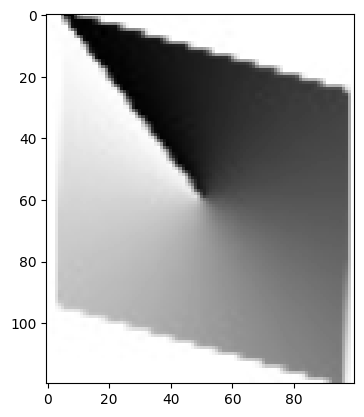

In [ ]:
plt.imshow(new_image, cmap='gray')

---

## Differentiation & Integration

In [ ]:
dy, dx = np.gradient(new_image, 1)

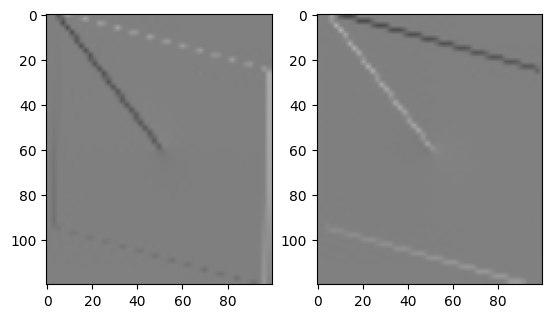

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(dx, cmap='gray', vmin=-255, vmax=255)
ax[1].imshow(dy, cmap='gray', vmin=-255, vmax=255)

[Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) is often used to find edges.

Applying an operator kernel over an `array` can be achieved by convolution:

In [ ]:
from scipy.signal import convolve2d

In [ ]:
sobel_x = np.array([
    [-1 ,0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

In [ ]:
dx_sobel = convolve2d(new_image, sobel_x[::-1, ::-1], mode='valid')
dy_sobel = convolve2d(new_image, sobel_y[::-1, ::-1], mode='valid')

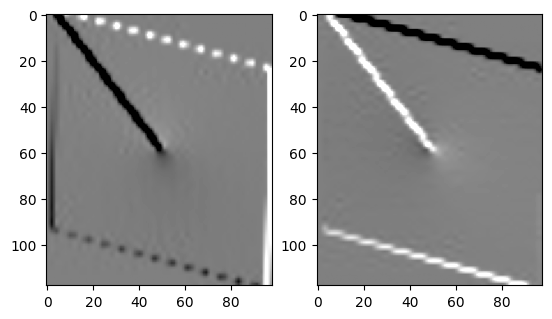

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(dx_sobel, cmap='gray', vmin=-255, vmax=255)
ax[1].imshow(dy_sobel, cmap='gray', vmin=-255, vmax=255)

---

## Fast Fourier Transform